<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()


In [8]:
x = iris.data
y = iris.target


In [9]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

In [13]:
x.shape

(150, 4)

# **Apply PCA and visualize Scree Plot**

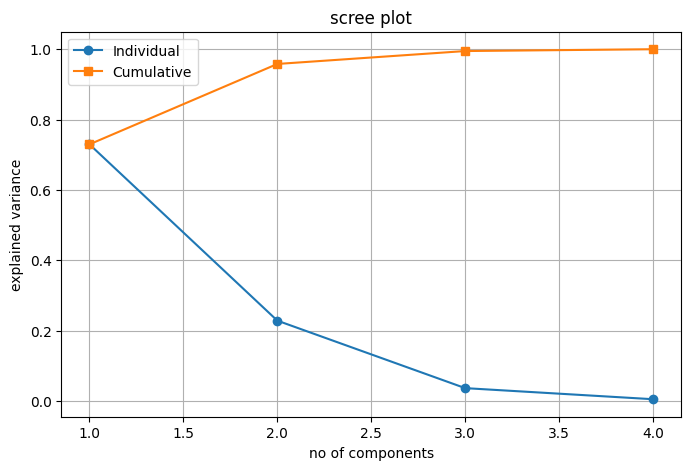

In [16]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
x_pca = pca.fit_transform(x_scaled)

#scree plot
plt.figure(figsize = (8, 5))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'o-', label = 'Individual')
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), 's-', label = 'Cumulative')
plt.xlabel("no of components")
plt.ylabel("explained variance")
plt.title("scree plot")
plt.grid(True)
plt.legend()
plt.show()

# **choose no of components (95% variance)**

In [20]:
pca_95 = PCA(n_components = 0.95)

x_reduced = pca_95.fit_transform(x_scaled)
print(f"Reduced Shape: {x_reduced.shape}")

Reduced Shape: (150, 2)


# **Visualize top 2 components**

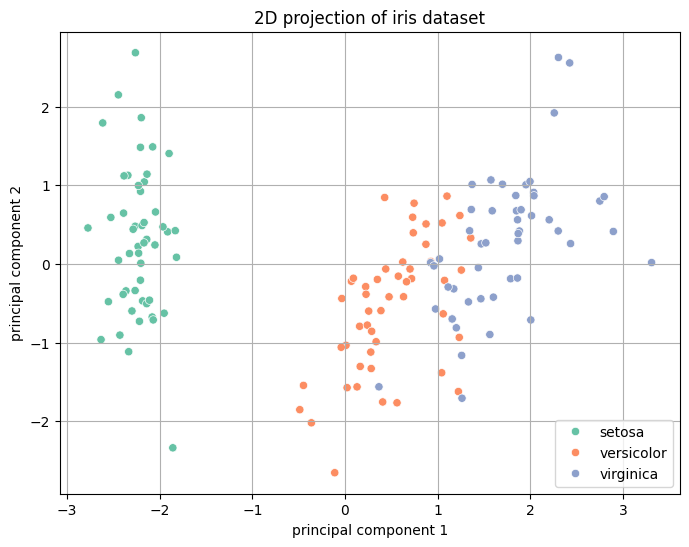

In [23]:
import seaborn as sns

pca_2d = PCA(n_components = 2)
x_2d = pca_2d.fit_transform(x_scaled)

plt.figure(figsize = (8,6))
sns.scatterplot(x = x_2d[:, 0], y = x_2d[:, 1],hue = iris.target_names[y], palette = 'Set2')
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.title("2D projection of iris dataset")
plt.grid(True)
plt.legend()
plt.show()